## Project Description:

#### General Instruction
- There will be two datasets for this project—one for classification models and the second for regression models. 
- Read data into Jupyter notebook use pandas to import data into a data frame. 
- Your submission should be commented on appropriately. Use the markdown cells in the iPython notebook to prepare your final report. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The exam should be syntax error-free. Run your code before the final submission. 

#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the classification_test and regression_test. Note that these two datasets don't have target columns. 
- Scale each dataset. Explain your choice of data scaling method. 
- Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model. 
- Regression dataset: Apply all the regression models you have learned in this class. Discuss the results and outcomes. Models with hyperparameters explain how you find the best value of the hyperparameters. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 
- Classification dataset: Apply all the classification models you have learned in this course. Discuss the results and outcomes. Discuss the choice of evaluation method and how it helps you find the best values of the model hyperparameters. 
- Find the best classification model among the list of models trained on the classification_train dataset. Use this model to predict the target values of the classification_test. 


#### Devliverable
Submit ONLY the iPython notebook or the .py file of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

Make sure to list the name and student id of all the group members in your iPython notebook file. 

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|learning model | Demonstrate limited understanding of methods used to train learning models | Demonstrate the ability to understand techniques used to train learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

# Regression

### Data Preprocessing on data set 

In [1]:
# Pandas and numpy liberary
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm

#Ploting liberary
import seaborn as sns

# sklearn liberaries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Create a dataframe from csv file
df = pd.read_csv('train_Regression.csv')
df.replace(r'^\s*$', np.nan, regex=True)

df_test = pd.read_csv('test_Regression.csv')
df_test.replace(r'^\s*$', np.nan, regex=True)


def one_hot_vector(df,column_name):
    """
    Method used to tranform the column into one hot vector:

    parameter:
    df - DataFrame
    column_name - String
    
    returns - pandas dataFrame
    """
    dummies = pd.get_dummies(df[column_name])
    df = pd.concat([df,dummies],axis ="columns")
    df = df.drop([column_name],axis="columns")
    return df


def map_to_one_and_zero(df,column_name):
    values=df[column_name].describe()
    top_freq = values.top
    top_freq_count = values.freq
    mapping = df[column_name].value_counts().to_dict()
    for value in mapping:
        if(value == top_freq and mapping[value]==top_freq_count):
            print(f"TOP_FREQ:   {value} AND top_freq_count__:  {mapping[value]} AND :{column_name}-> {value}:1")
            mapping[value] = 1
        else:
            print(f"LEAST_FREQ: {value} AND least_freq_count_: {mapping[value]} AND : {column_name}-> {value}:0")
            mapping[value] = 0
    
    print("Mapping:",mapping)
    df.replace({column_name:mapping},True)
    print(df.isna().sum())
    return df

def get_column_perception(df,column_name):
    print(f"{column_name} Mean            :: {df[column_name].mean()}")
    print(f"{column_name} Median          :: {df[column_name].median()}")
    print(f"{column_name} Max             :: {df[column_name].max()}")
    print(f"{column_name} Min             :: {df[column_name].min()}")
    print(f"{column_name} Unique          :: {df[column_name].unique()}")
    print(f"{column_name} value_counts    :: {df[column_name].value_counts()}")



MODE = "Mode"
MEDIAN = "Median"
MEAN = "Mean"

def get_operation(df,operation):
    """
    Method used to calculate the [ MEAN, MEDIAN, MODE] based on the operation feed

    parameter:
        df : Pandas as DataFrame
        Operation : It suppots operations like: MEAN, MEDIAN, MODE
    returns:
         Int based on the operation
    """
    if operation== MODE:
        mode =df.mode()
        if len(mode)>0:
            return df.mode()[0]
        else:
            return np.NaN
    elif operation == MEDIAN:
        return df.median()
    else:
        return df.mean()
    
    
def impute_missing_value(df,dependent_column,replace_column,operation= MODE,inplace = True):
    """
    Method used to tranform the column into one hot vector:

    parameter:
        df : Pandas as DataFrame
        dependent_column : The dependent column name as string
        replace_column :  The replace column name as string
        Operation : It suppots operations like: MEAN, MEDIAN, MODE
        inplace : By default holds True, Used for replace columns
    returns:
         pandas dataFrame
    """
    unique_values = df[dependent_column].unique()
    total_nans = 0
    if(df[replace_column].isna().sum()>0):
        
#         print(df.isna().sum())
        for i in unique_values: 
            temp_df =df.loc[df[dependent_column]==i]
            mode = get_operation(temp_df[replace_column],operation)
            sum_of_nans= temp_df[replace_column].isna().sum()
            if(sum_of_nans > 0):
                print(f" no of nan's {sum_of_nans}    -> At {dependent_column} :{i}   -> Replaced with {replace_column}: {mode}")
                if inplace:
                    total_nans= total_nans+sum_of_nans
                    df.update(temp_df.replace({replace_column:{np.NaN : mode}}))
        if inplace: 
            df = df[df[replace_column].notna()]
        print(f" Total NaN's {total_nans}")
    
    print(df.isna().sum())
    return df


## Feateure set:

hour = "Hour"  
temperature = "Temperature(C)"              
humidity = "Humidity(%)"               
wind_speed = "Wind speed (m/s)"            
visibility = "Visibility (10m)"          
dew_point_temperature = "Dew point temperature(C)"    
solar_radiation = "Solar Radiation (MJ/m2)"     
rainfall = "Rainfall(mm)"               
snowfall = "Snowfall (cm)"               
seasons= "Seasons"                     
holiday = "Holiday"                     
functioning_day = "Functioning Day"   
rented_bike_count = "Rented Bike Count"

# The View of the data set
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hour                      6393 non-null   float64
 1   Temperature(C)            6361 non-null   float64
 2   Humidity(%)               6360 non-null   float64
 3   Wind speed (m/s)          6377 non-null   float64
 4   Visibility (10m)          6380 non-null   float64
 5   Dew point temperature(C)  6373 non-null   float64
 6   Solar Radiation (MJ/m2)   6369 non-null   float64
 7   Rainfall(mm)              6359 non-null   float64
 8   Snowfall (cm)             6380 non-null   float64
 9   Seasons                   6361 non-null   object 
 10  Holiday                   6403 non-null   object 
 11  Functioning Day           6374 non-null   object 
 12  Rented Bike Count         6570 non-null   int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 667.4+ KB


Hour                        177
Temperature(C)              209
Humidity(%)                 210
Wind speed (m/s)            193
Visibility (10m)            190
Dew point temperature(C)    197
Solar Radiation (MJ/m2)     201
Rainfall(mm)                211
Snowfall (cm)               190
Seasons                     209
Holiday                     167
Functioning Day             196
Rented Bike Count             0
dtype: int64

### Overview of the data set 

### Feature set  with missing values :

        Hour                        177
        Temperature(C)              209
        Humidity(%)                 210
        Wind speed (m/s)            193
        Visibility (10m)            190
        Dew point temperature(C)    197
        Solar Radiation (MJ/m2)     201
        Rainfall(mm)                211
        Snowfall (cm)               190
        Seasons                     209
        Holiday                     167
        Functioning Day             196

### There are lot of missing values on each columnn, we will start analysing the each colum and then we can start fill missing values based on the startegy

<AxesSubplot:>

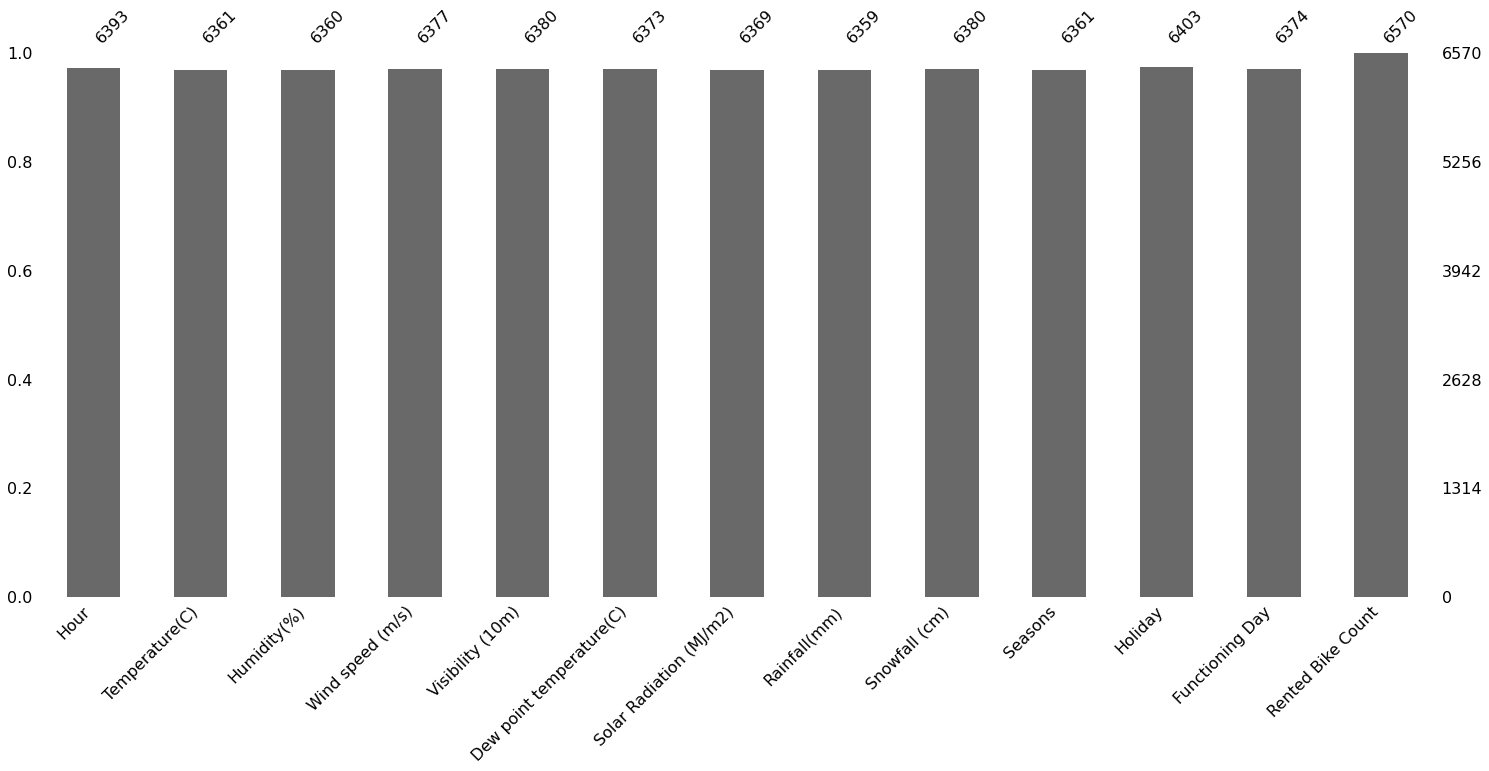

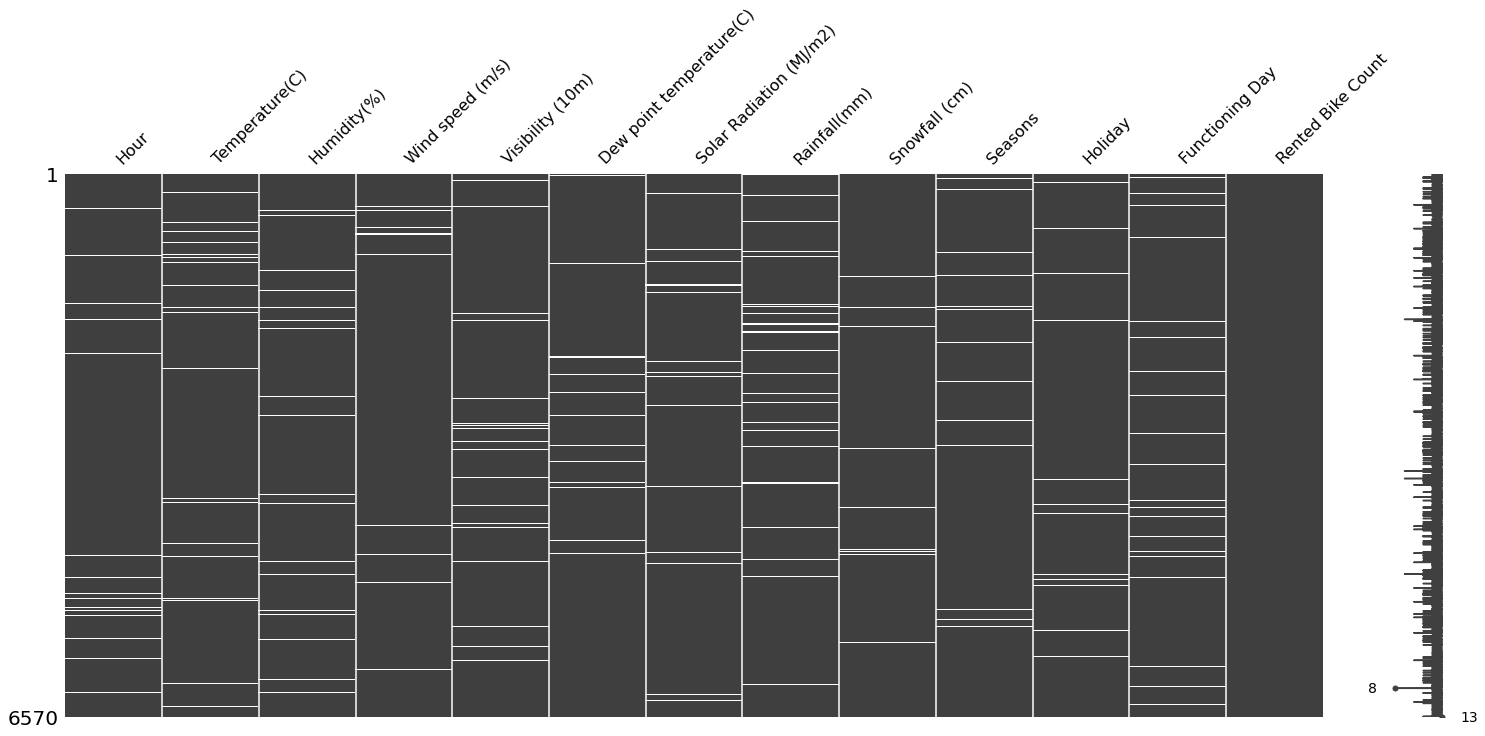

In [2]:
msno.bar(df)
msno.matrix(df)

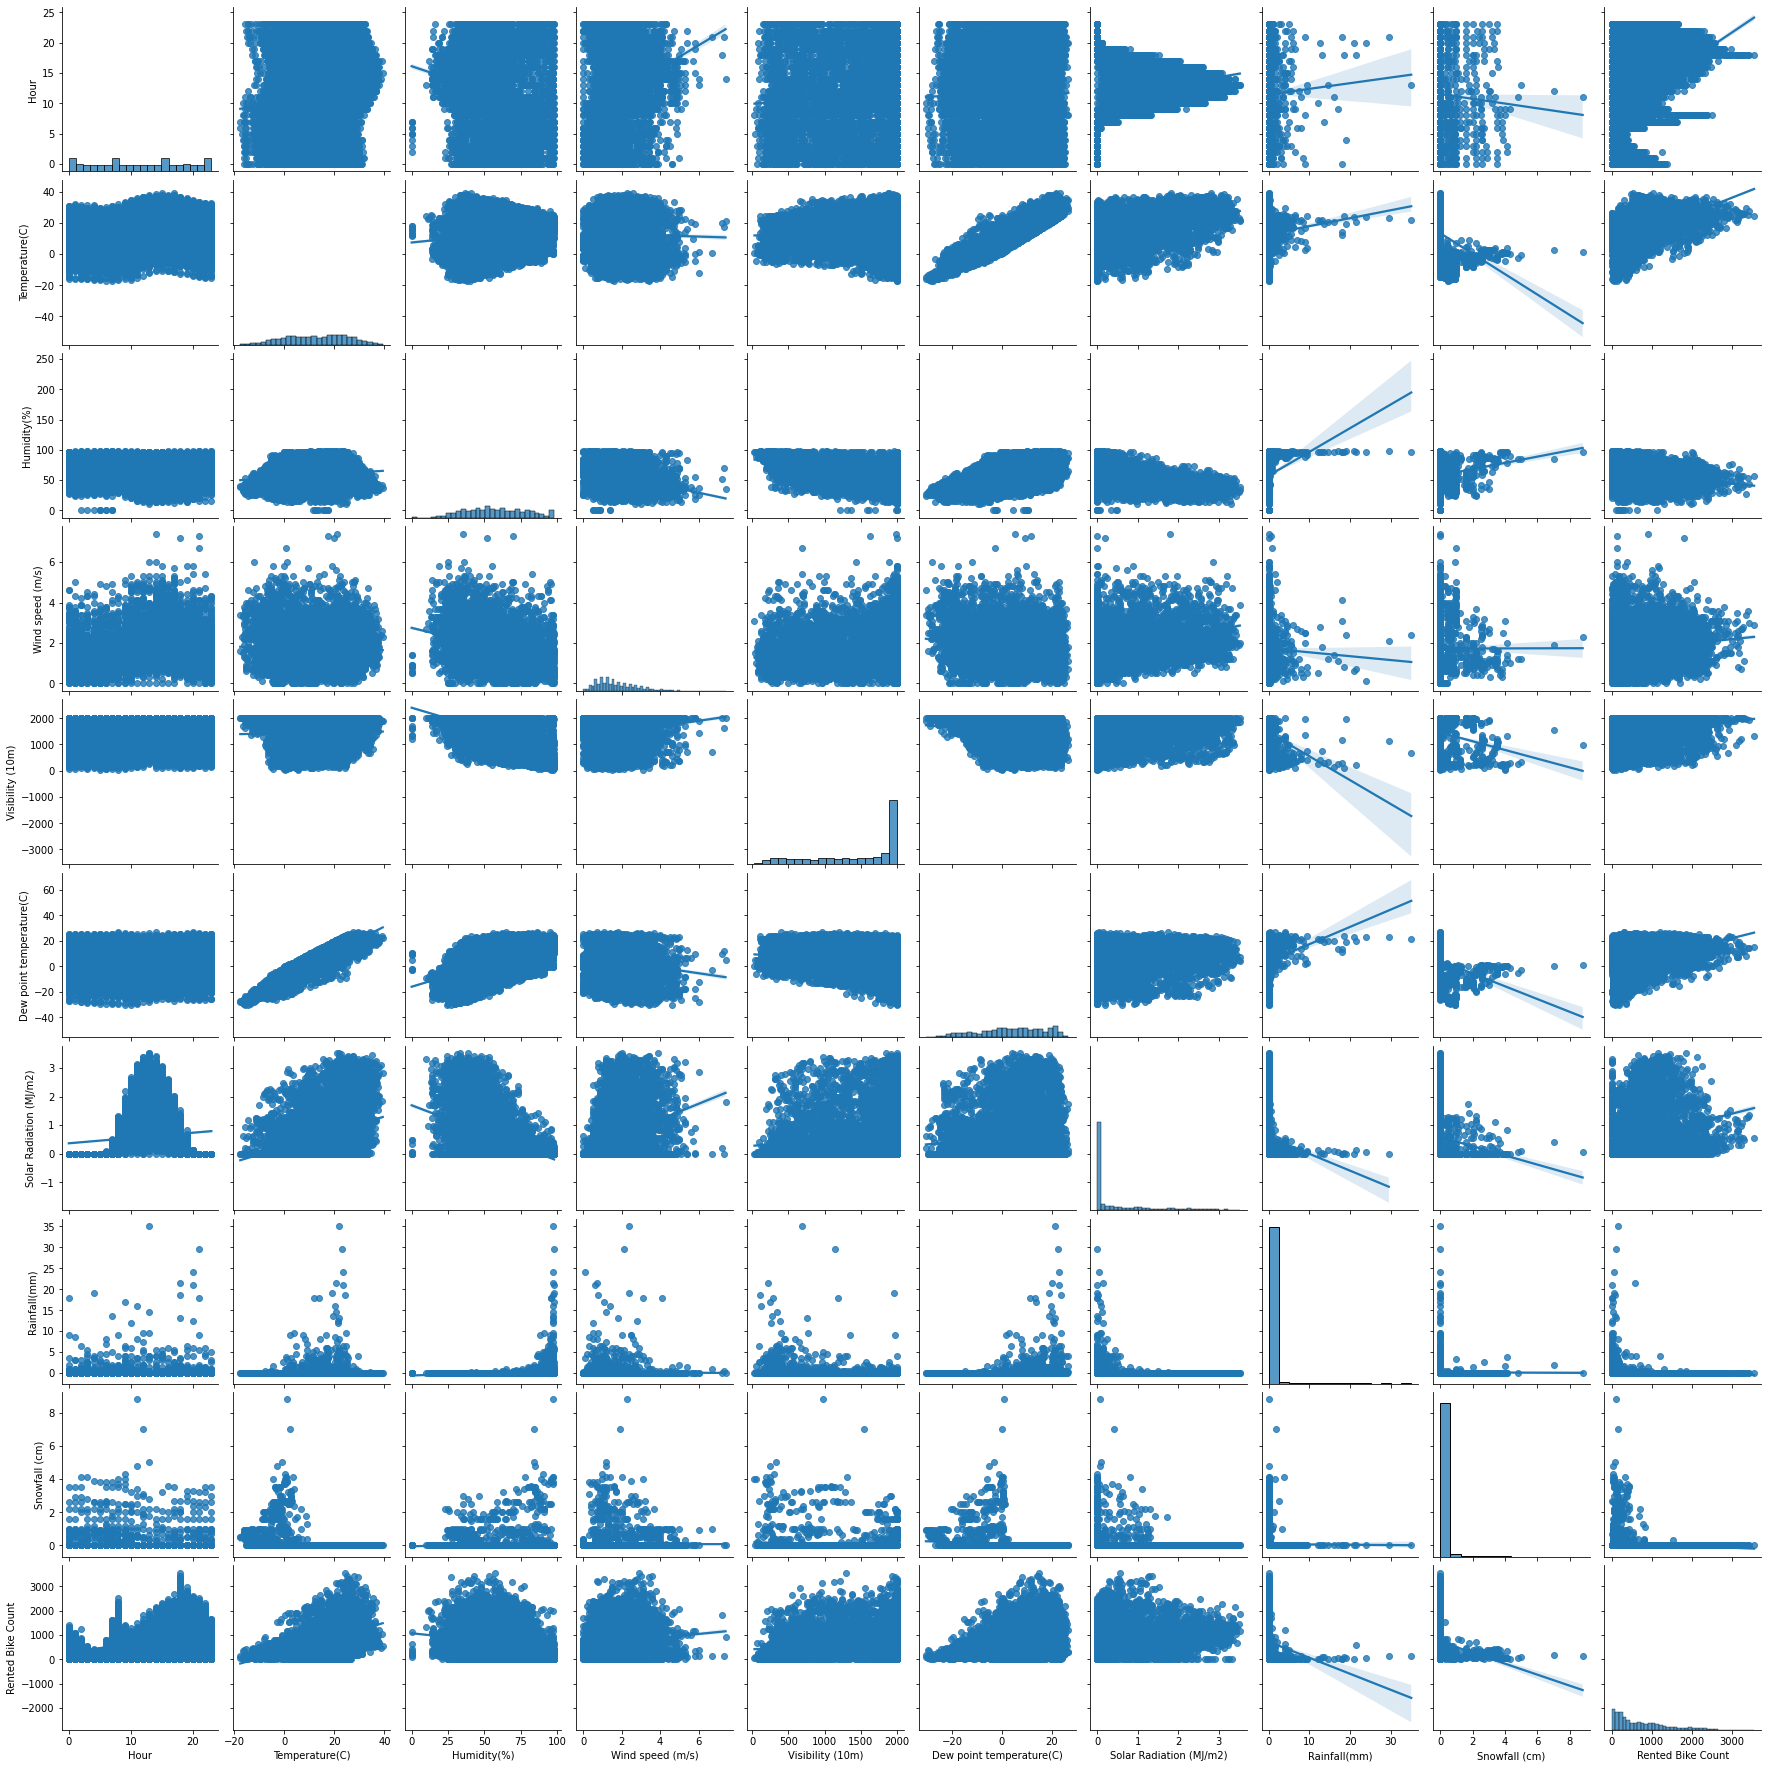

In [3]:
sns.pairplot(df,kind="reg")

In [4]:
df.corr()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
Hour,1.000000,0.138793,-0.234469,0.284892,0.096181,0.020472,0.145881,0.015794,-0.023560,0.415459
Temperature(C),0.138793,1.000000,0.159802,-0.033804,0.033459,0.913491,0.365354,0.049199,-0.226923,0.543138
Humidity(%),-0.234469,0.159802,1.000000,-0.345752,-0.551184,0.535562,-0.452539,0.225992,0.106060,-0.194417
Wind speed (m/s),0.284892,-0.033804,-0.345752,1.000000,0.182967,-0.175576,0.324718,-0.021376,0.000744,0.125297
Visibility (10m),0.096181,0.033459,-0.551184,0.182967,1.000000,-0.178178,0.146296,-0.163897,-0.114634,0.197154
Dew point temperature(C),0.020472,0.913491,0.535562,-0.175576,-0.178178,1.000000,0.107920,0.121947,-0.159638,0.387911
Solar Radiation (MJ/m2),0.145881,0.365354,-0.452539,0.324718,0.146296,0.107920,1.000000,-0.073668,-0.077303,0.265395
Rainfall(mm),0.015794,0.049199,0.225992,-0.021376,-0.163897,0.121947,-0.073668,1.000000,-0.004850,-0.118493
Snowfall (cm),-0.023560,-0.226923,0.106060,0.000744,-0.114634,-0.159638,-0.077303,-0.004850,1.000000,-0.145907
Rented Bike Count,0.415459,0.543138,-0.194417,0.125297,0.197154,0.387911,0.265395,-0.118493,-0.145907,1.000000


####  Analysis from the above computed correlation matrix, ther are few colums which are highly correlated to each other,
#### Eg:  Hour is highly correlated to solar radation & humidity & below tables explanins how they are correlated to each other 

        Hour                         ->  Humidity, Solar Radiation
        Temperature(C)               ->  Dew point temperature, Seasons 
        Humidity(%)                  ->  Dew point Temperature, Visibility, Hour
        Wind speed (m/s)             ->  No correlation
        Visibility (10m)             ->  Humidity
        Dew point temperature(C)     ->  Temperature, Humidity,Seasons
        Solar Radiation (MJ/m2)      ->  Hour
        Rainfall(mm)                 ->  No correlation
        Snowfall (cm)                ->  No correlation	
        Seasons                      ->  Temperature, Dew Point Temperature
        Holiday                      ->  No correlation
        Functioning Day              ->  No correlation

<AxesSubplot:xlabel='Hour', ylabel='Solar Radiation (MJ/m2)'>

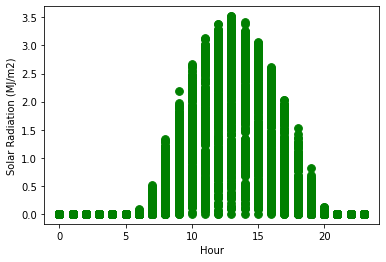

In [5]:
#Filing Missing values for hour based on the solar radtion form sun, because they are correlated to each other 

# Let me explian how does this work Am imputting hours missing value based on the solar ration 
# if there is solar radtion of 1.0 in this chunk of hours where we have missing values 
# so,am filing those rows based on meadian hour from the chunk of data.

def impute_hour(df):
    df = impute_missing_value(df = df,
              dependent_column = solar_radiation,
              replace_column = hour,
              operation = MEDIAN,
              inplace = True)
    return df

df.plot.scatter(x=hour, y=solar_radiation, s=60, c='green')

Text(0.5, 0, 'Temperature(C)')

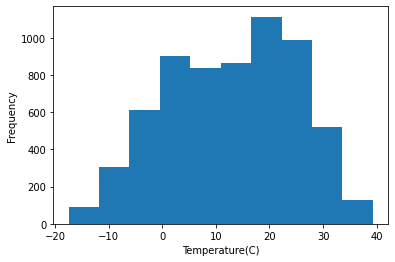

In [6]:
#Filing Missing values for temperature based on the seasons: 

def impute_temperature(df):
    return impute_missing_value(df = df,
              dependent_column = seasons,
              replace_column = temperature,
              operation = MEAN,
              inplace = True)


plt = df[temperature].plot(kind = 'hist')
plt.set_xlabel(temperature)

<AxesSubplot:xlabel='Humidity(%)', ylabel='Hour'>

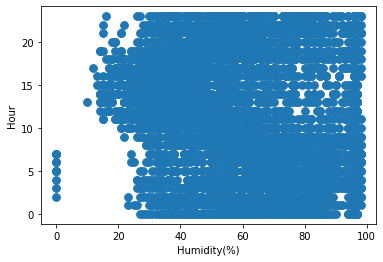

In [7]:
#Filing Missing values for humidity based on the Hour: 

def impute_humidity(df):
    df = impute_missing_value(df = df,
                          dependent_column = hour,
                          replace_column = humidity,
                          operation = MEDIAN,
                          inplace = True)
    return df

df.plot.scatter(x=humidity, y=hour, s=60)

In [8]:
# Wind speed (m/s)
def impute_wind_speed(df):
    windspeed_median = df[wind_speed].median()
    df[wind_speed].replace(np.NaN,windspeed_median,True)
    return df



In [9]:
#Filing Missing values for Visibility (10m) based on the Humidity: 

def impute_visibility(df):
    return impute_missing_value(df = df,
                              dependent_column = humidity,
                              replace_column = visibility,
                              operation = MEDIAN, 
                              inplace = True)


In [10]:
#Filing Missing values for Dew point temperature(C) based on the seasons: 

def impute_dew_point_temperature(df):
    return impute_missing_value(df = df,
                          dependent_column = seasons,
                          replace_column = dew_point_temperature,
                          operation = MEAN,
                          inplace = True)


In [11]:
#Filing Missing values for Solar Radiation (MJ/m2) based on the hour: 

def impute_solar_radiation(df):
    return impute_missing_value(df = df,
                          dependent_column = hour,
                          replace_column = solar_radiation,
                          operation = MEDIAN,
                          inplace = True)

In [12]:
#Filing Missing values for rainfall based highest/mode no of rainfaill : 

#Rainfall(mm)
def impute_rainfall(df):
    rainfall_highFreq = df[rainfall].value_counts().keys()[0]
    df[rainfall].replace(np.NaN,rainfall_highFreq,True)
    return df


In [13]:
#Filing Missing values for snowfall based highest/mode no of rainfaill : 

#Snowfall (cm)
def impute_snowfall(df):
    snowfall_hignFreq = df[snowfall].value_counts().keys()[0]
    df[snowfall].replace(np.NaN,snowfall_hignFreq,True)
    return df


In [14]:
#Filing Missing values for Seasons based on the hour: 

def impute_seasons(df):
    df = impute_missing_value(df = df,
                      dependent_column = dew_point_temperature,
                      replace_column = seasons,
                      operation = MODE,
                      inplace = True)
    df = one_hot_vector(df,seasons)
    return df


In [15]:
#Filing Missing values for holiday based highest not of outcomes form the same colum & 
# performing the binomial transforamtion 

# Holiday
def impute_holiday(df):
    holiday_highFreq = df[holiday].value_counts().keys()[0]
    df[holiday].replace(np.NaN,holiday_highFreq,True)
    val_1 = df[holiday].value_counts().keys()[0]
    val_2 = df[holiday].value_counts().keys()[1]
    df[holiday].replace([val_1,val_2],[1,0],True)
    
    return df


In [16]:
#Filing Missing values for functioning_day based highest not of outcomes form the same colum & 
# performing the binomial transforamtion 

# #Functioning Day
def impute_functioning_day(df):
    functionday_highFreq = df[functioning_day].value_counts().keys()[0]
    df[functioning_day].replace(np.NaN,functionday_highFreq,True)
    val_1 = df[functioning_day].value_counts().keys()[0]
    val_2 = df[functioning_day].value_counts().keys()[1]
    df[functioning_day].replace([val_1,val_2],[1,0],True)
    return df


In [17]:

def preprocess_data(df):
    """
    Method used to Preprocess the whole dataFrame & impute the missing values & also dose so of 
    the tranformation basaed on the colum like it can be either binomila or on hot vector 
    
    parameter:
        df : Pandas as DataFrame
        
    returns:
         pandas dataFrame
    """
   
    df = impute_hour(df) # impute hour
    df = impute_temperature(df) # impute temperature
    df = impute_humidity(df) # impute humidity
    df = impute_wind_speed(df) # impute wind speed
    df = impute_visibility(df) # impute visibility
    df = impute_dew_point_temperature(df) # impute dew point temperature
    df = impute_solar_radiation(df) # impute solar radation 
    df = impute_rainfall(df) # impute rain fall
    df = impute_snowfall(df) # impute snowfall
    df = impute_seasons(df) # impute seasons
    df = impute_holiday(df) # impute holiday
    df = impute_functioning_day(df) # impute functional day
    return df

df = preprocess_data(df)
df_test = preprocess_data(df_test)
    

# Feature set or independent variables
X_train = df[df.columns]
X_train.drop(columns=[rented_bike_count],inplace=True)
X_test= df_test[df_test.columns]

# dependent variable or predeiction variable:

y_train = df['Rented Bike Count']


 no of nan's 90    -> At Solar Radiation (MJ/m2) :0.0   -> Replaced with Hour: 5.0
 no of nan's 1    -> At Solar Radiation (MJ/m2) :0.14   -> Replaced with Hour: 11.5
 no of nan's 1    -> At Solar Radiation (MJ/m2) :1.13   -> Replaced with Hour: 13.5
 no of nan's 1    -> At Solar Radiation (MJ/m2) :0.37   -> Replaced with Hour: 16.0
 no of nan's 1    -> At Solar Radiation (MJ/m2) :0.59   -> Replaced with Hour: 11.0
 no of nan's 4    -> At Solar Radiation (MJ/m2) :0.01   -> Replaced with Hour: 18.0
 no of nan's 1    -> At Solar Radiation (MJ/m2) :2.33   -> Replaced with Hour: 11.0
 no of nan's 1    -> At Solar Radiation (MJ/m2) :0.06   -> Replaced with Hour: 9.0
 no of nan's 1    -> At Solar Radiation (MJ/m2) :1.97   -> Replaced with Hour: 15.0
 no of nan's 1    -> At Solar Radiation (MJ/m2) :0.26   -> Replaced with Hour: 15.0
 no of nan's 1    -> At Solar Radiation (MJ/m2) :0.8   -> Replaced with Hour: 14.5
 no of nan's 1    -> At Solar Radiation (MJ/m2) :0.04   -> Replaced with Hour: 

C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 60    -> At Seasons :Spring   -> Replaced with Temperature(C): 13.100388852883993
 no of nan's 49    -> At Seasons :Winter   -> Replaced with Temperature(C): -2.629600523903078
 no of nan's 44    -> At Seasons :Summer   -> Replaced with Temperature(C): 26.706972240154943
 Total NaN's 202
Hour                          0
Temperature(C)                0
Humidity(%)                 209
Wind speed (m/s)            192
Visibility (10m)            190
Dew point temperature(C)    196
Solar Radiation (MJ/m2)     200
Rainfall(mm)                211
Snowfall (cm)               189
Seasons                     202
Holiday                     167
Functioning Day             196
Rented Bike Count             0
dtype: int64
 no of nan's 7    -> At Hour :23.0   -> Replaced with Humidity(%): 62.0


C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 9    -> At Hour :14.0   -> Replaced with Humidity(%): 40.0


C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 1    -> At Hour :19.0   -> Replaced with Humidity(%): 52.0


C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 16    -> At Hour :12.0   -> Replaced with Humidity(%): 44.0
 no of nan's 13    -> At Hour :4.0   -> Replaced with Humidity(%): 68.5
 no of nan's 4    -> At Hour :9.0   -> Replaced with Humidity(%): 59.0
 no of nan's 9    -> At Hour :1.0   -> Replaced with Humidity(%): 67.0
 no of nan's 8    -> At Hour :16.0   -> Replaced with Humidity(%): 40.0
 no of nan's 8    -> At Hour :11.0   -> Replaced with Humidity(%): 48.0
 no of nan's 7    -> At Hour :2.0   -> Replaced with Humidity(%): 68.0
 no of nan's 10    -> At Hour :13.0   -> Replaced with Humidity(%): 41.0
 no of nan's 11    -> At Hour :10.0   -> Replaced with Humidity(%): 53.0
 no of nan's 12    -> At Hour :5.0   -> Replaced with Humidity(%): 72.0
 no of nan's 6    -> At Hour :6.0   -> Replaced with Humidity(%): 74.0
 no of nan's 9    -> At Hour :17.0   -> Replaced with Humidity(%): 42.5
 no of nan's 8    -> At Hour :22.0   -> Replaced with Humidity(%): 60.5
 no of nan's 7    -> At Hour :3.0   -> Replaced with Humidity(%):

C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 8    -> At Hour :20.0   -> Replaced with Humidity(%): 55.0
 no of nan's 7    -> At Hour :8.0   -> Replaced with Humidity(%): 66.0
 no of nan's 6    -> At Hour :7.0   -> Replaced with Humidity(%): 71.0
 no of nan's 9    -> At Hour :0.0   -> Replaced with Humidity(%): 63.0
 no of nan's 7    -> At Hour :18.0   -> Replaced with Humidity(%): 47.0
 no of nan's 15    -> At Hour :15.0   -> Replaced with Humidity(%): 38.0
 no of nan's 12    -> At Hour :21.0   -> Replaced with Humidity(%): 59.0
 Total NaN's 209
Hour                          0
Temperature(C)                0
Humidity(%)                   0
Wind speed (m/s)            192
Visibility (10m)            190
Dew point temperature(C)    196
Solar Radiation (MJ/m2)     200
Rainfall(mm)                211
Snowfall (cm)               189
Seasons                     202
Holiday                     167
Functioning Day             196
Rented Bike Count             0
dtype: int64
 no of nan's 6    -> At Humidity(%) :83.0   -> Repl

 no of nan's 11    -> At Hour :4.0   -> Replaced with Solar Radiation (MJ/m2): 0.0
 no of nan's 11    -> At Hour :9.0   -> Replaced with Solar Radiation (MJ/m2): 0.61
 no of nan's 8    -> At Hour :1.0   -> Replaced with Solar Radiation (MJ/m2): 0.0
 no of nan's 8    -> At Hour :16.0   -> Replaced with Solar Radiation (MJ/m2): 1.09
 no of nan's 8    -> At Hour :11.0   -> Replaced with Solar Radiation (MJ/m2): 1.59
 no of nan's 8    -> At Hour :2.0   -> Replaced with Solar Radiation (MJ/m2): 0.0
 no of nan's 8    -> At Hour :13.0   -> Replaced with Solar Radiation (MJ/m2): 1.92
 no of nan's 9    -> At Hour :10.0   -> Replaced with Solar Radiation (MJ/m2): 1.125
 no of nan's 11    -> At Hour :5.0   -> Replaced with Solar Radiation (MJ/m2): 0.0
 no of nan's 6    -> At Hour :6.0   -> Replaced with Solar Radiation (MJ/m2): 0.0
 no of nan's 11    -> At Hour :17.0   -> Replaced with Solar Radiation (MJ/m2): 0.635
 no of nan's 7    -> At Hour :22.0   -> Replaced with Solar Radiation (MJ/m2): 0.

 no of nan's 2    -> At Dew point temperature(C) :-25.0   -> Replaced with Seasons: Winter
 no of nan's 1    -> At Dew point temperature(C) :-4.7   -> Replaced with Seasons: Winter
 no of nan's 1    -> At Dew point temperature(C) :21.4   -> Replaced with Seasons: Summer
 no of nan's 1    -> At Dew point temperature(C) :-2.4   -> Replaced with Seasons: Spring
 no of nan's 1    -> At Dew point temperature(C) :-9.8   -> Replaced with Seasons: Winter
 no of nan's 1    -> At Dew point temperature(C) :21.2   -> Replaced with Seasons: Summer
 no of nan's 1    -> At Dew point temperature(C) :4.9   -> Replaced with Seasons: Spring
 no of nan's 1    -> At Dew point temperature(C) :12.3   -> Replaced with Seasons: Spring
 no of nan's 2    -> At Dew point temperature(C) :-5.3   -> Replaced with Seasons: Spring
 no of nan's 1    -> At Dew point temperature(C) :-3.5   -> Replaced with Seasons: Winter
 no of nan's 4    -> At Dew point temperature(C) :2.6   -> Replaced with Seasons: Autumn
 no of nan'

 no of nan's 1    -> At Solar Radiation (MJ/m2) :0.38   -> Replaced with Hour: 8.5
 no of nan's 1    -> At Solar Radiation (MJ/m2) :2.87   -> Replaced with Hour: 13.0
 no of nan's 1    -> At Solar Radiation (MJ/m2) :2.37   -> Replaced with Hour: 14.0
 no of nan's 1    -> At Solar Radiation (MJ/m2) :0.68   -> Replaced with Hour: 8.0
 no of nan's 1    -> At Solar Radiation (MJ/m2) :0.14   -> Replaced with Hour: 17.5
 Total NaN's 60
Hour                         0
Temperature(C)              61
Humidity(%)                 67
Wind speed (m/s)            91
Visibility (10m)            81
Dew point temperature(C)    62
Solar Radiation (MJ/m2)     55
Rainfall(mm)                76
Snowfall (cm)               44
Seasons                     60
Holiday                     67
Functioning Day             76
dtype: int64
 no of nan's 12    -> At Seasons :Spring   -> Replaced with Temperature(C): 12.937786259541983


C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 14    -> At Seasons :Autumn   -> Replaced with Temperature(C): 14.706470588235293
 no of nan's 18    -> At Seasons :Winter   -> Replaced with Temperature(C): -2.306451612903226
 no of nan's 15    -> At Seasons :Summer   -> Replaced with Temperature(C): 26.41722222222222
 Total NaN's 59
Hour                         0
Temperature(C)               0
Humidity(%)                 67
Wind speed (m/s)            91
Visibility (10m)            81
Dew point temperature(C)    62
Solar Radiation (MJ/m2)     55
Rainfall(mm)                75
Snowfall (cm)               44
Seasons                     58
Holiday                     67
Functioning Day             76
dtype: int64
 no of nan's 1    -> At Hour :3.0   -> Replaced with Humidity(%): 74.0


C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 4    -> At Hour :2.0   -> Replaced with Humidity(%): 70.0


C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 5    -> At Hour :17.0   -> Replaced with Humidity(%): 46.0


C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 1    -> At Hour :22.0   -> Replaced with Humidity(%): 59.0


C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 3    -> At Hour :15.0   -> Replaced with Humidity(%): 40.0


C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 4    -> At Hour :12.0   -> Replaced with Humidity(%): 45.0


C:\Users\Prade\AppData\Local\Temp\ipykernel_8736\2734076799.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(temp_df.replace({replace_column:{np.NaN : mode}}))


 no of nan's 4    -> At Hour :20.0   -> Replaced with Humidity(%): 56.0
 no of nan's 3    -> At Hour :23.0   -> Replaced with Humidity(%): 62.0
 no of nan's 4    -> At Hour :8.0   -> Replaced with Humidity(%): 69.0
 no of nan's 7    -> At Hour :5.0   -> Replaced with Humidity(%): 72.0
 no of nan's 3    -> At Hour :0.0   -> Replaced with Humidity(%): 69.0
 no of nan's 4    -> At Hour :1.0   -> Replaced with Humidity(%): 65.0
 no of nan's 2    -> At Hour :7.0   -> Replaced with Humidity(%): 72.0
 no of nan's 1    -> At Hour :9.0   -> Replaced with Humidity(%): 56.0
 no of nan's 3    -> At Hour :16.0   -> Replaced with Humidity(%): 39.0
 no of nan's 2    -> At Hour :10.0   -> Replaced with Humidity(%): 51.0
 no of nan's 3    -> At Hour :18.0   -> Replaced with Humidity(%): 46.5
 no of nan's 2    -> At Hour :6.0   -> Replaced with Humidity(%): 69.0
 no of nan's 3    -> At Hour :13.0   -> Replaced with Humidity(%): 42.5
 no of nan's 2    -> At Hour :4.0   -> Replaced with Humidity(%): 75.0


Hour                         0
Temperature(C)               0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(C)     0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                75
Snowfall (cm)               44
Seasons                     54
Holiday                     67
Functioning Day             76
dtype: int64
 no of nan's 1    -> At Dew point temperature(C) :17.5   -> Replaced with Seasons: Autumn
 no of nan's 1    -> At Dew point temperature(C) :2.6   -> Replaced with Seasons: Winter
 no of nan's 1    -> At Dew point temperature(C) :19.6   -> Replaced with Seasons: Summer
 no of nan's 1    -> At Dew point temperature(C) :5.9   -> Replaced with Seasons: Autumn
 no of nan's 1    -> At Dew point temperature(C) :-2.6   -> Replaced with Seasons: Autumn
 no of nan's 2    -> At Dew point temperature(C) :15.8   -> Replaced with Seasons: Autumn
 no of nan's 1    -> At Dew point temperature(C) :6.6   -> Replaced with Seas

#### Checking the multi colinearity b/w the columns:
Since we found that temperature & Dew point temperature are multi colinear , we are dropping the dew point tempaerature because these is one of the assumption of the linear regression.

In [18]:
%matplotlib inline

# X_train.columns.size
# plt.imshow(np.corrcoef(X_train.T))
# plt.xticks(np.arange(X_train.columns.size), X_train.columns, rotation = 90)
# plt.yticks(np.arange(X_train.columns.size), X_train.columns)
# plt.colorbar()
# plt.show()


# droping one of column since temperature & dew point are mutlicolinear to each other form the below:
X_train.drop(columns=[dew_point_temperature],inplace=True)
X_test.drop(columns=[dew_point_temperature],inplace=True)

### Scaling dataset using MinMax Scaler

In [19]:

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)

### OLS model Analysis:

Analysis Since none of the columns 𝑃>|𝑡|  which is   𝑝 -value. A  𝑝 -value of less than 0.05 is considered to be statistically significant,it concludes that a significant difference does exist. So in our scenario all of them are less then that we not dropping any other columns & moving forward

In [20]:
import statsmodels.api as sm
# build the model 
model = sm.OLS(y_train.values ,X_train_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     590.1
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:07:54   Log-Likelihood:                -49150.
No. Observations:                6554   AIC:                         9.833e+04
Df Residuals:                    6540   BIC:                         9.842e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Hour                      635.8798     19.838     32.054      0.000     596.991     674.768
Temperature(C)           1495.0777     58.050     25.755      0.000    1381.280    1608.875
Humidity(%)              -739.3090     42.385    -17.443      0.000    -822.398    -656.220
Wind speed (m/s)          122.9827     44.385      2.771      0.006      35.974     209.992
Visibility (10m)           64.1951     22.739      2.823      0.005      19.620     108.770
Solar Radiation (MJ/m2)  -265.4876     30.070     -8.829      0.000    -324.434    -206.541
Rainfall(mm)            -1958.3045    170.456    -11.489      0.000   -2292.454   -1624.155
Snowfall (cm)             246.7388    122.240      2.018      0.044       7.109     486.369
Holiday                   113.8900     25.369      4.489      0.000      64.158     163.622
Functioning Day           922.4731     33.001     27.953      0.000     857.780     987.166
Autumn                   -849.2967     66.149    -12.839      0.000    -978.970    -719.624
Spring                   -962.1981     66.055    -14.567      0.000   -1091.687    -832.709
Summer                   -990.9275     76.072    -13.026      0.000   -1140.054    -841.801
Winter                  -1190.9627     58.689    -20.293      0.000   -1306.013   -1075.913
==============================================================================
Omnibus:                      979.161   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1868.508
Skew:                           0.936   Prob(JB):                         0.00
Kurtosis:                       4.828   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Spliting dataset into train dataset and valid dataset:

Chuking the data frame into train data into 75 percentage is used for train the remaining part is used for validation

In [21]:
Xr_train, Xr_valid, yr_train, yr_valid = train_test_split(X_train_scaled, y_train, train_size = 0.75, random_state = 0)


### Regression model training

In [22]:
# Intialze the linear Regression Object
lreg = LinearRegression()

# Training the model
lreg.fit(Xr_train, yr_train)

yr_train_predict = lreg.predict(Xr_train)

yr_valid_predict = lreg.predict(Xr_valid)


print("Intercept value",lreg.intercept_)
print("coefficient value",lreg.coef_)

Intercept value 1.0788416526563442e+16
coefficient value [ 6.26121357e+02  1.49085547e+03 -7.75819468e+02  1.46605604e+02
  5.61927074e+01 -2.82163804e+02 -1.78674748e+03  2.64278967e+02
  9.57294285e+01  8.90489353e+02 -1.07884165e+16 -1.07884165e+16
 -1.07884165e+16 -1.07884165e+16]


### Model evaluation: R2 Score for Linear Regression 

When compare both the train & valid r2 score of linear regression, it a less over fit , so moving on for the next model for training

In [23]:
# Calculaing the test score for the test & valid data set ,by 
# Comparing the scores, it is little bit under fitting.

print('train r2-score: ', r2_score(yr_train, yr_train_predict))
print('valid r2-score: ', r2_score(yr_valid, yr_valid_predict))


# Calculating the Mean square error and mean absolute error:

print("MSE for valid dataset ::",mean_squared_error(yr_valid, yr_valid_predict))
print("MAE for valid dataset ::",mean_absolute_error(yr_valid, yr_valid_predict))

train r2-score:  0.5434548767508637
valid r2-score:  0.52792948741016
MSE for valid dataset :: 202611.98474679684
MAE for valid dataset :: 335.69310555216595


### Polynominal Regression:

In [24]:

# Initialize the PolynomialFeatures  with degree 2, Because if degree is more than 2 model was over fitting.
poly = PolynomialFeatures(degree=2)

# Training the model using the Xr_train which we have splitted above 
poly.fit(Xr_train)

# Scaling the Xr_train using the transform
X_train_poly_scale = poly.transform(Xr_train)

# Scaling the Xr_valid using the transform
X_valid_poly_scale = poly.transform(Xr_valid)

# Scaling the X_test using the transform
X_test_poly_scale = poly.transform(X_test_scaled)


#Initialize the LinearRegression object
lreg = LinearRegression()

# Train the trained ploy scale data:
lreg.fit(X_train_poly_scale, yr_train)


#Predict y for train::
yr_train_predict = lreg.predict(X_train_poly_scale)
#Predict y for valid::
yr_valid_predict = lreg.predict(X_valid_poly_scale)


### Model evaluation for Ploynominal Regression, using the R2 score & MSE, MAE

So, since both R2 scores having less delate between the train & valid this am considersing this as the best fit model


In [25]:
# Calculaing the test score for the test & valid data set , It's a best fit compared to previous model:
# print('train Score: ', lreg.score(X_train_poly_scale, yr_train))
# print('valid Score: ', lreg.score(X_valid_poly_scale, yr_valid))

print('train r2-score: ', r2_score(yr_train, yr_train_predict))
print('valid r2-score: ', r2_score(yr_valid, yr_valid_predict))

train r2-score:  0.6919704777522244
valid r2-score:  0.6816624173688332


#### Prediction of Ploynominal regression

In [26]:
# predicting the y
y_test_predict = lreg.predict(X_test_poly_scale)

pd.DataFrame(y_test_predict)

,0
0,402.25
1,482.50
2,410.75
3,23.75
4,1159.00
...,...
2176,313.75
2177,966.50
2178,988.75
2179,-57.25


In [27]:
# Calculating the Mean square error and mean absolute error:

print("MSE for valid dataset ::",mean_squared_error(yr_valid, yr_valid_predict))
print("MAE for valid dataset ::",mean_absolute_error(yr_valid, yr_valid_predict))

MSE for valid dataset :: 136630.03241305673
MAE for valid dataset :: 259.79042098840756


### DecisionTree Regessor:

In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# instatiate the decision tree regressor:
dec_reg = DecisionTreeRegressor(max_features = 10, 
                                            min_samples_split = 32,
                                            max_depth = 9, 
                                            random_state = 0)
  
# Fitting the model:
dec_reg.fit(Xr_train ,yr_train)

DecisionTreeRegressor(max_depth=9, max_features=10, min_samples_split=32,
                      random_state=0)

### Model evaluation for DecisionTree Regessor, using the R2 score & MSE, MAE


In [29]:
# Predicting the Y for train & valid
yr_train_predict = dec_reg.predict(Xr_train)
yr_valid_predict = dec_reg.predict(Xr_valid)

print('train score for :Decision Tree:',r2_score(yr_train, yr_train_predict))
print('valid score for :Decision Tree:',r2_score(yr_valid, yr_valid_predict))


train score for :Decision Tree: 0.8180483903090161
valid score for :Decision Tree: 0.769825765736698


#### Prediction of DecisionTree Regessor

In [30]:
y_test_predict = dec_reg.predict(X_test_scaled)

pd.DataFrame(y_test_predict)

,0
0,176.654762
1,410.894515
2,427.826087
3,159.821429
4,798.352941
...,...
2176,145.689655
2177,269.240506
2178,698.613208
2179,0.000000


### MSE, MAE for DecisionTree Regessor


In [31]:

print("MSE for valid dataset ::",mean_squared_error(yr_valid, yr_valid_predict))
print("MAE for valid dataset ::",mean_absolute_error(yr_valid, yr_valid_predict))


MSE for valid dataset :: 98790.45015078432
MAE for valid dataset :: 199.20590471998062


# Work Logs

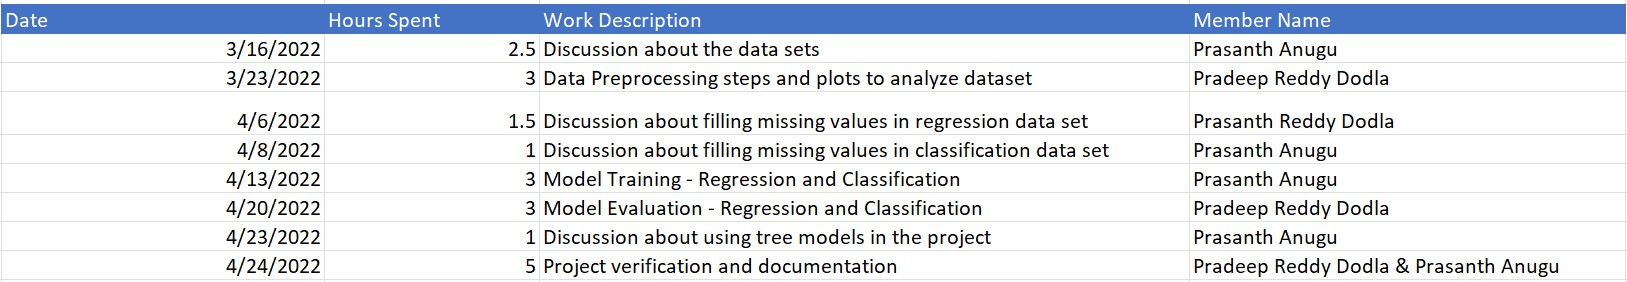